In [2]:
import pandas as pd
crypto_data = pd.read_csv('all_data.csv')

In [3]:
# lets get info about the data
crypto_data.head()

,Symbol,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,BTCUSDT,2018-05-02,9071.48,9268.00,8970.20,9247.84,26123.543961,2018-05-02 23:59:59.999,2.384218e+08,188258,13960.455528,1.274396e+08,0
1,BTCUSDT,2018-05-03,9247.81,9844.00,9168.40,9750.00,38768.388288,2018-05-03 23:59:59.999,3.660284e+08,282581,21093.140343,1.992344e+08,0
2,BTCUSDT,2018-05-04,9750.00,9830.04,9520.85,9713.99,28681.588879,2018-05-04 23:59:59.999,2.775660e+08,210165,14779.499554,1.430704e+08,0
3,BTCUSDT,2018-05-05,9714.00,10020.00,9682.00,9864.00,24990.018345,2018-05-05 23:59:59.999,2.468076e+08,212076,13011.844293,1.285276e+08,0
4,BTCUSDT,2018-05-06,9863.99,9970.00,9417.03,9659.01,27690.351559,2018-05-06 23:59:59.999,2.673594e+08,229309,13297.506959,1.284278e+08,0


In [4]:
crypto_data.describe()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
count,10398.000000,10398.000000,10398.000000,10398.000000,1.039800e+04,1.039800e+04,1.039800e+04,1.039800e+04,1.039800e+04,10398.0
mean,4798.647559,4919.771456,4666.520662,4802.416608,1.204237e+08,6.396170e+08,6.072379e+05,5.982377e+07,3.179161e+08,0.0
std,11473.474726,11768.032230,11146.383861,11480.496471,2.900450e+08,1.249593e+09,1.129422e+06,1.443667e+08,6.206141e+08,0.0
min,0.023320,0.026500,0.017650,0.023290,5.743934e+03,9.955444e+05,4.886000e+03,2.728509e+03,4.958391e+05,0.0
25%,0.449275,0.465675,0.432675,0.449750,2.753368e+05,4.211479e+07,9.244425e+04,1.387668e+05,2.096135e+07,0.0
50%,107.670000,113.755000,103.610000,108.055000,1.482379e+06,1.513696e+08,2.358680e+05,7.645184e+05,7.643504e+07,0.0
75%,1892.622500,1940.470000,1861.145000,1895.405000,1.386135e+08,6.297201e+08,6.829292e+05,6.895425e+07,3.125594e+08,0.0
max,67525.820000,69000.000000,66222.400000,67525.830000,8.608358e+09,1.746531e+10,1.522359e+07,4.210780e+09,8.783916e+09,0.0


In [6]:
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10398 entries, 0 to 10397
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Symbol                        10398 non-null  object 
 1   Open time                     10398 non-null  object 
 2   Open                          10398 non-null  float64
 3   High                          10398 non-null  float64
 4   Low                           10398 non-null  float64
 5   Close                         10398 non-null  float64
 6   Volume                        10398 non-null  float64
 7   Close time                    10398 non-null  object 
 8   Quote asset volume            10398 non-null  float64
 9   Number of trades              10398 non-null  int64  
 10  Taker buy base asset volume   10398 non-null  float64
 11  Taker buy quote asset volume  10398 non-null  float64
 12  Ignore                        10398 non-null  int64  
dtypes

In [7]:
###checking missing values
print(crypto_data.isnull().sum())


Symbol                          0
Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
dtype: int64


In [8]:
# lets change the date time
crypto_data['Open time'] = pd.to_datetime(crypto_data['Open time'])
crypto_data['Close time'] = pd.to_datetime(crypto_data['Close time'])


In [41]:
# As we can see from the data the values for the ignore column is always 0 which has no any benefit at all.
# so let's drop it
crypto_data.drop('Ignore', axis=1, inplace=True)

In [44]:
# now let us save the new cleaned data
crypto_data.to_csv('Cleaned_Crypto_Data.csv', index=False)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

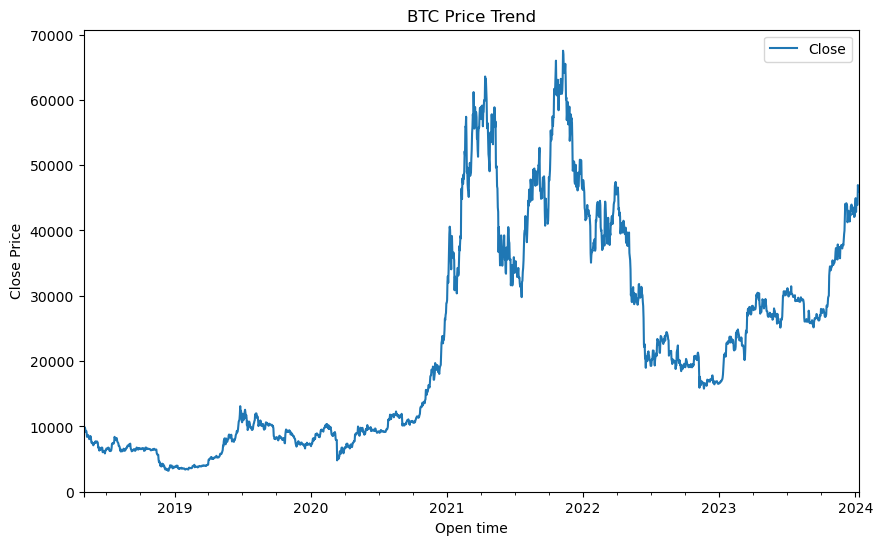

In [12]:
# now let's see how the trend of the crypto price is over the last few years
btc_data = crypto_data[crypto_data['Symbol'] == 'BTCUSDT']

# Plotting the 'Close' price against 'Open time'
btc_data.plot(x='Open time', y='Close', figsize=(10, 6))

# Setting the title and y-axis label of the plot
plt.title('BTC Price Trend')
plt.ylabel('Close Price')

# Displaying the plot
plt.show()



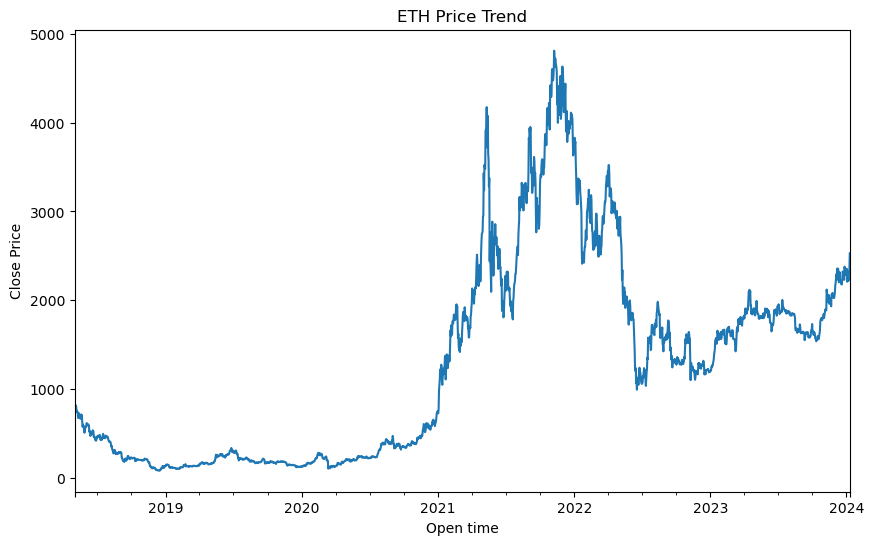

In [47]:
crypto_data[crypto_data['Symbol'] == 'ETHUSDT'].set_index('Open time')['Close'].plot(figsize=(10, 6))
plt.title('ETH Price Trend')
plt.ylabel('Close Price')
plt.show()

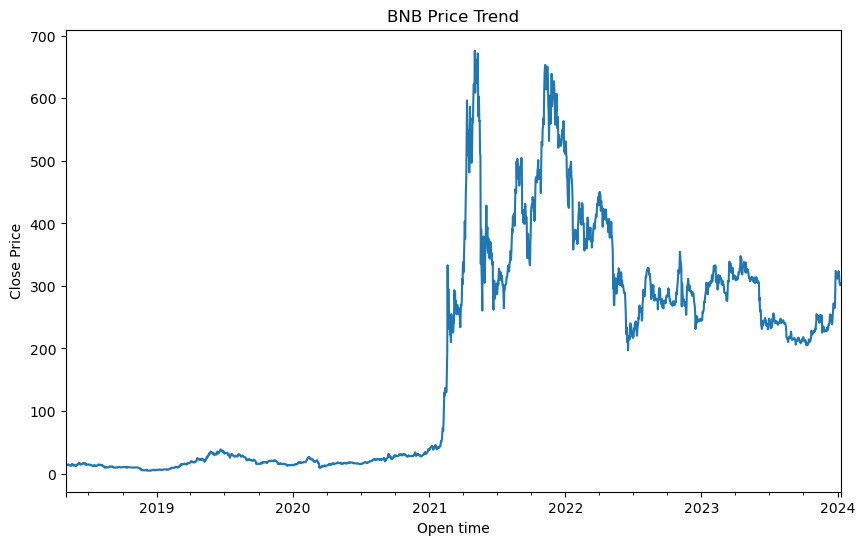

In [13]:
crypto_data[crypto_data['Symbol'] == 'BNBUSDT'].set_index('Open time')['Close'].plot(figsize=(10, 6))
plt.title('BNB Price Trend')
plt.ylabel('Close Price')
plt.show()

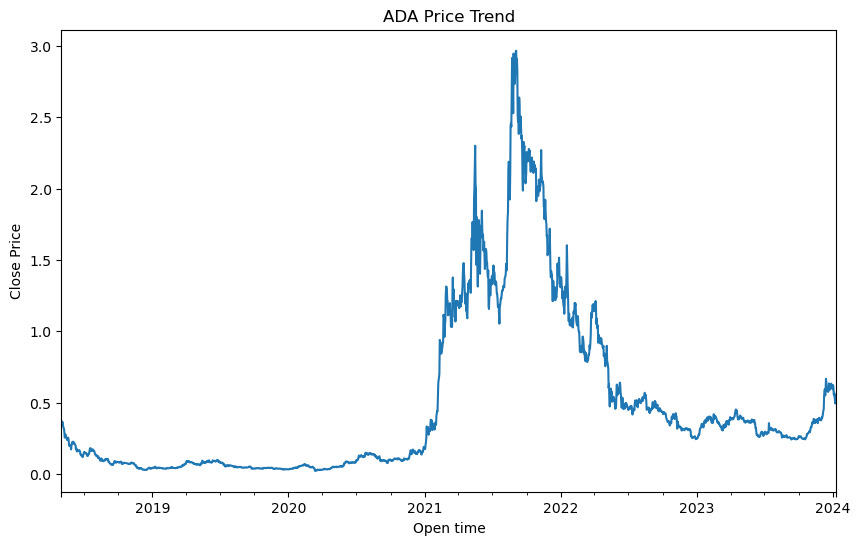

In [49]:
crypto_data[crypto_data['Symbol'] == 'ADAUSDT'].set_index('Open time')['Close'].plot(figsize=(10, 6))
plt.title('ADA Price Trend')
plt.ylabel('Close Price')
plt.show()

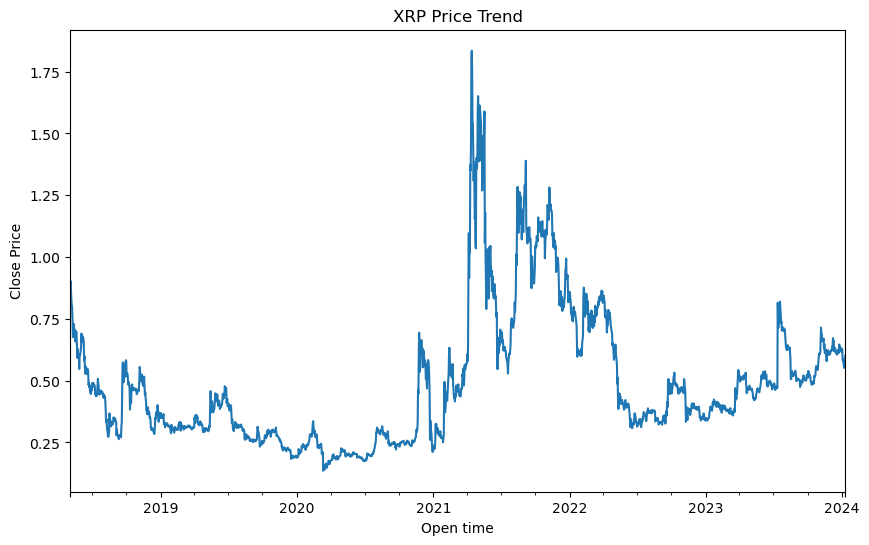

In [50]:
crypto_data[crypto_data['Symbol'] == 'XRPUSDT'].set_index('Open time')['Close'].plot(figsize=(10, 6))
plt.title('XRP Price Trend')
plt.ylabel('Close Price')
plt.show()

### Based on the visual data presented, it's evident that there's a general downtrend in the value of cryptocurrencies. The years 2021 and 2022 emerged as particularly strong periods for these digital currencies, as indicated by their significantly higher values during this time. However, beginning in 2023, there has been a noticeable decline in their worth, suggesting a shift in the market dynamics for cryptocurrencies.

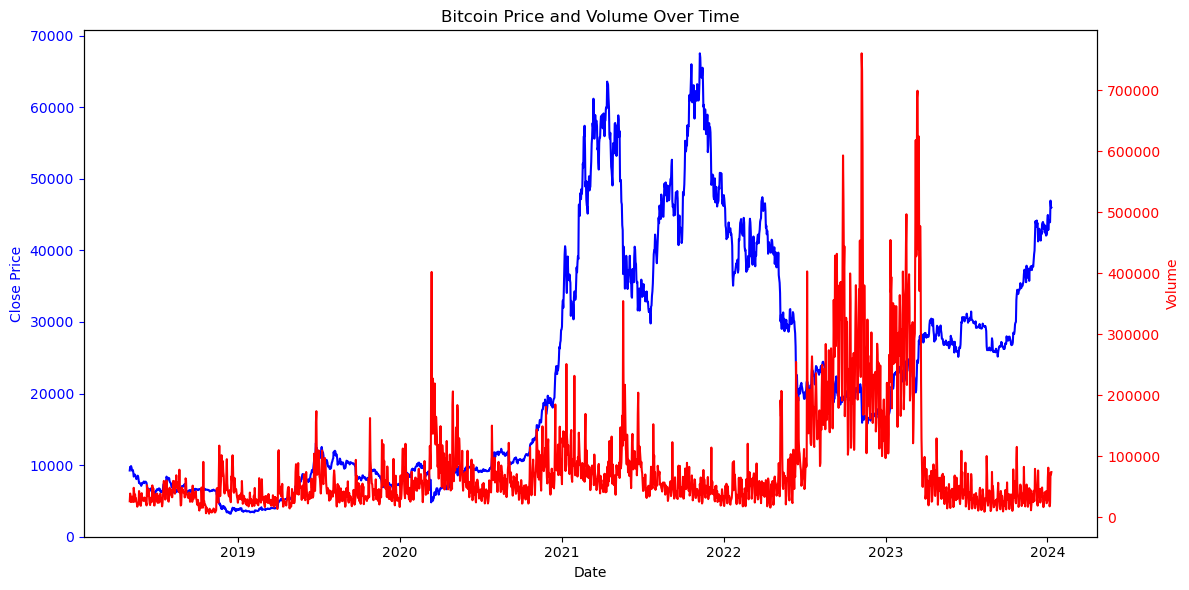

In [15]:
import matplotlib.pypblot as plt

btc_data = crypto_data[crypto_data['Symbol'] == 'BTCUSDT']

# Creating a figure with two subplots (axes)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the closing price
ax1.plot(btc_data['Open time'], btc_data['Close'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params('y', colors='blue')

# Creating another y-axis to plot volume
ax2 = ax1.twinx()
ax2.plot(btc_data['Open time'], btc_data['Volume'], color='red', label='Volume')
ax2.set_ylabel('Volume', color='red')
ax2.tick_params('y', colors='red')

# Adding a title and a legend
plt.title('Bitcoin Price and Volume Over Time')
fig.tight_layout()
plt.show()


### From the above graph we can say that Volume Increase Despite Price Decline: In 2023, despite the declining price trend, the trading volume is high. This could be indicative of various market behaviors for instance It may reflect a sell-off period where investors are liquidating their holdings due to a loss of confidence or it could also indicate increased market activity, perhaps due to traders taking advantage of the volatility to make short-term trades

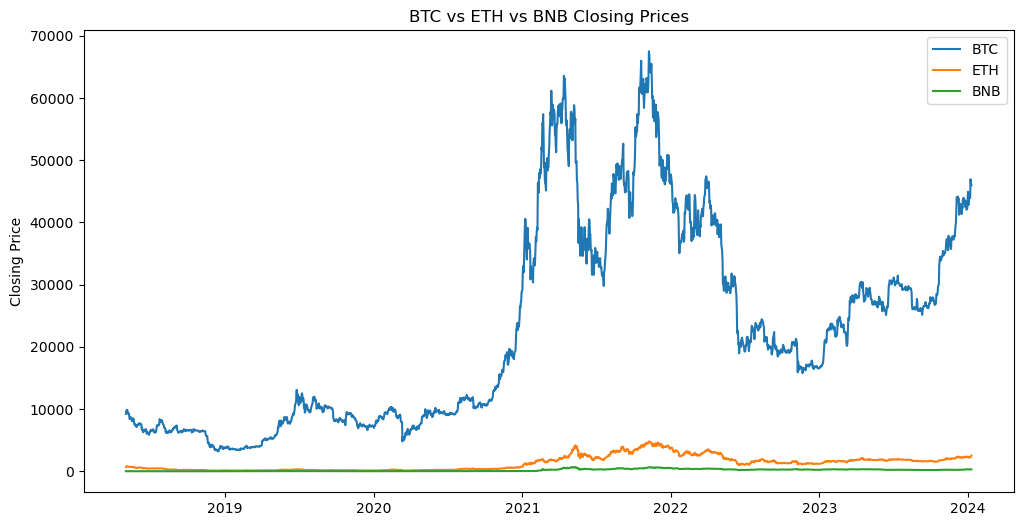

In [62]:

btc_prices = crypto_data[crypto_data['Symbol'] == 'BTCUSDT'].set_index('Open time')['Close']
eth_prices = crypto_data[crypto_data['Symbol'] == 'ETHUSDT'].set_index('Open time')['Close']
bnb_prices = crypto_data[crypto_data['Symbol'] == 'BNBUSDT'].set_index('Open time')['Close']
plt.figure(figsize=(12, 6))
plt.plot(btc_prices, label='BTC')
plt.plot(eth_prices, label='ETH')
plt.plot(bnb_prices, label='BNB')
plt.title('BTC vs ETH vs BNB Closing Prices')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

### As you can see from the above comparsion of the top three currencies although all of them are showing somewhat a decline we can say that bitcoin is very expensive than the others 

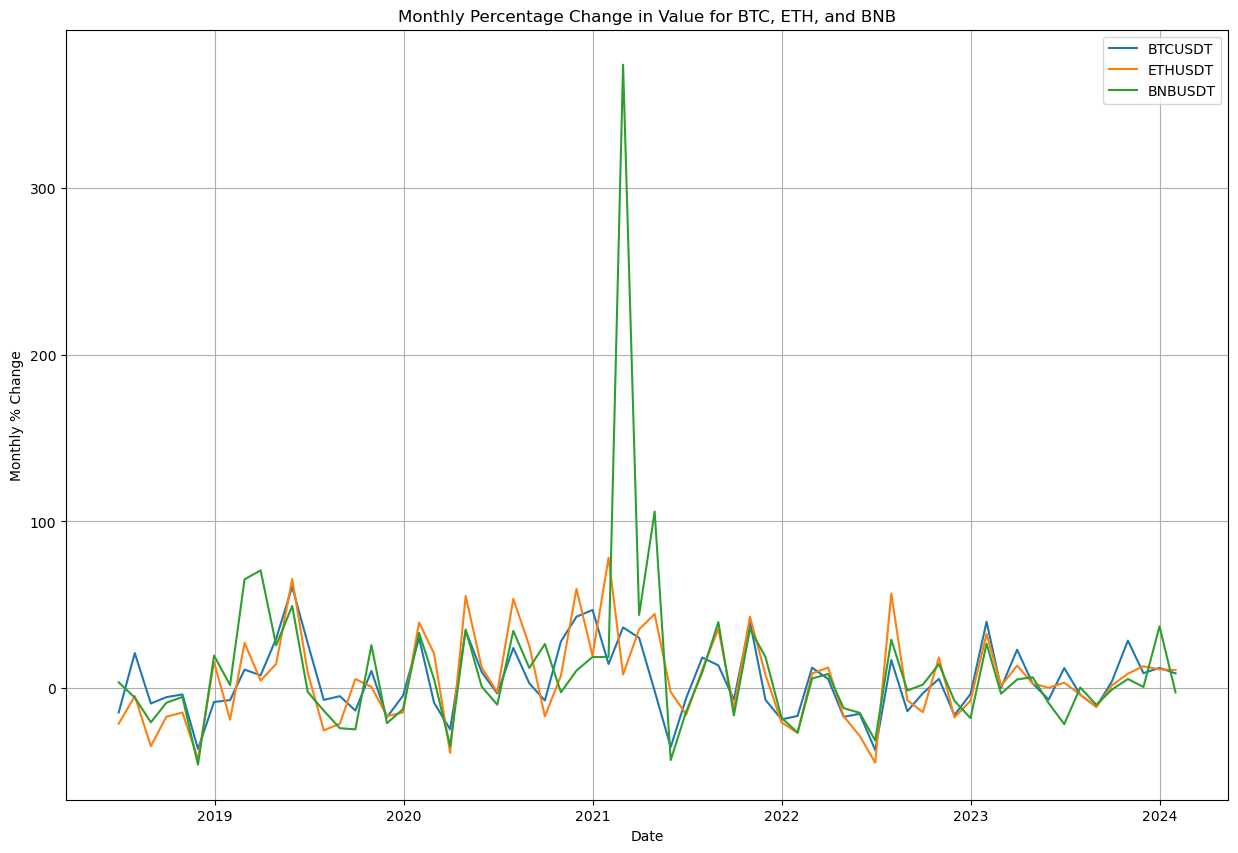

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming crypto_data is your DataFrame with all the cryptocurrency data
# and it's already been loaded into your environment

# Filter the dataset for BTC, ETH, and BNB
cryptos = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT']
filtered_data = crypto_data[crypto_data['Symbol'].isin(cryptos)]

# Setting up the plot
plt.figure(figsize=(15, 10))

# Looping through each of the selected cryptocurrencies
for crypto in cryptos:
    # Filter data for each cryptocurrency
    crypto_specific_data = filtered_data[filtered_data['Symbol'] == crypto]

    # Resample to monthly data and calculate the percentage change
    monthly_change = crypto_specific_data.set_index('Open time')['Close'].resample('M').ffill().pct_change() * 100

    # Plot
    plt.plot(monthly_change, label=crypto)

plt.xlabel('Date')
plt.ylabel('Monthly % Change')
plt.title('Monthly Percentage Change in Value for BTC, ETH, and BNB')
plt.legend()
plt.grid(True)
plt.show()


### Based on the above visualization which presents us the change percentage of the three currencies per month, from this we can conclude that each cryptocurrencies exhibits unpredictable behaviour and they are vey unstable.